In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import os

In [ ]:
twitter_accounts_df: pd.DataFrame = pd.read_csv("final_Database.csv", index_col=0)
print(f"Dataset shape {twitter_accounts_df.shape}")

In [ ]:
print(f"Dataset columns: {twitter_accounts_df.columns}")
twitter_accounts_df.head()

Dataset columns: Index(['screen_name', 'location', 'description', 'followers_count',
       'friends_count', 'favourites_count', 'verified', 'statuses_count',
       'lang', 'default_profile', 'default_profile_image', 'account_type'],
      dtype='object')


,screen_name,location,description,followers_count,friends_count,favourites_count,verified,statuses_count,lang,default_profile,default_profile_image,account_type
id_str,,,,,,,,,,,,
8.157458e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...",1291.0,0.0,0.0,FALSE,78554.0,en,True,False,bot
4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,1.0,349.0,38.0,FALSE,31.0,en,True,False,bot
4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",1086.0,0.0,0.0,FALSE,713.0,en,True,False,bot
3.063139e+09,sc_papers,NaN,NaN,33.0,0.0,0.0,FALSE,676.0,en,True,True,bot
2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,11.0,745.0,146.0,FALSE,185.0,en,False,False,bot


In [ ]:
# Functions to preprocess the DataFrame
def convert_bool_to_int(data: pd.DataFrame, boolean_cols: list):
    try:
        for col in boolean_cols:
            data[col] = data[col].astype(int)
    except Exception as e:
        print(e)
    return data

def popularity_metric(friends_count: int, followers_count: int):
    return np.round(np.log(1+friends_count) * np.log(1+followers_count), 3)


def compute_popularity_metric(row):
    return popularity_metric(friends_count=row["friends_count"],
                             followers_count=row["followers_count"])

In [ ]:
# Preprocess boolean columns
boolean_cols: list = ["default_profile", "default_profile_image",
                      "geo_enabled", "verified"]
twitter_accounts_df = convert_bool_to_int(data=twitter_accounts_df, boolean_cols=boolean_cols)
twitter_accounts_df.head()

cannot convert float NaN to integer


,screen_name,location,description,followers_count,friends_count,favourites_count,verified,statuses_count,lang,default_profile,default_profile_image,account_type
id_str,,,,,,,,,,,,
8.157458e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...",1291.0,0.0,0.0,FALSE,78554.0,en,1,False,bot
4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,1.0,349.0,38.0,FALSE,31.0,en,1,False,bot
4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",1086.0,0.0,0.0,FALSE,713.0,en,1,False,bot
3.063139e+09,sc_papers,NaN,NaN,33.0,0.0,0.0,FALSE,676.0,en,1,True,bot
2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,11.0,745.0,146.0,FALSE,185.0,en,0,False,bot


In [ ]:
# Create a custom metric to measure the popularity of an input account
twitter_accounts_df["popularity"] = twitter_accounts_df.apply(compute_popularity_metric, axis=1)

# Let's show some examples of such value
twitter_accounts_df[['popularity']]

,popularity
id_str,
8.157458e+17,0.000
4.843621e+09,4.060
4.303727e+09,0.000
3.063139e+09,0.000
2.955142e+09,16.437
...,...
3.299611e+09,0.000
7.450000e+17,2.503
2.598999e+09,14.374


In [ ]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
twitter_accounts_df = twitter_accounts_df.dropna()

In [ ]:
# Set up some parameters for EDA
palette: str = "husl"
grouped: str = "account_type"
default_value: str = "unknown"

In [ ]:
def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels: dict = dict()
    try:
        labels: list = df[column].unique().tolist()
        colors: list = sns.color_palette(palette, len(labels))
        data_labels: dict = dict(zip(labels, colors))
    except Exception as e:
        logger.error(e)
    return data_labels

# Retrieve labels and additional parameters to plot figures
data_labels: dict = get_labels_colors_from_pandas_column(
    df=twitter_accounts_df, column=grouped, palette=palette)

In [ ]:
# Show labels
print(f"Unique Target values: {data_labels.keys()}")

Unique Target values: dict_keys(['bot', 'human'])


In [ ]:
# Functions to plot data distributions
def plot_multiple_histograms(data: pd.DataFrame,
                             grouped_col: str,
                             target_col: str,
                             data_labels: dict):
    # Plot
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels: list = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(12, 10))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


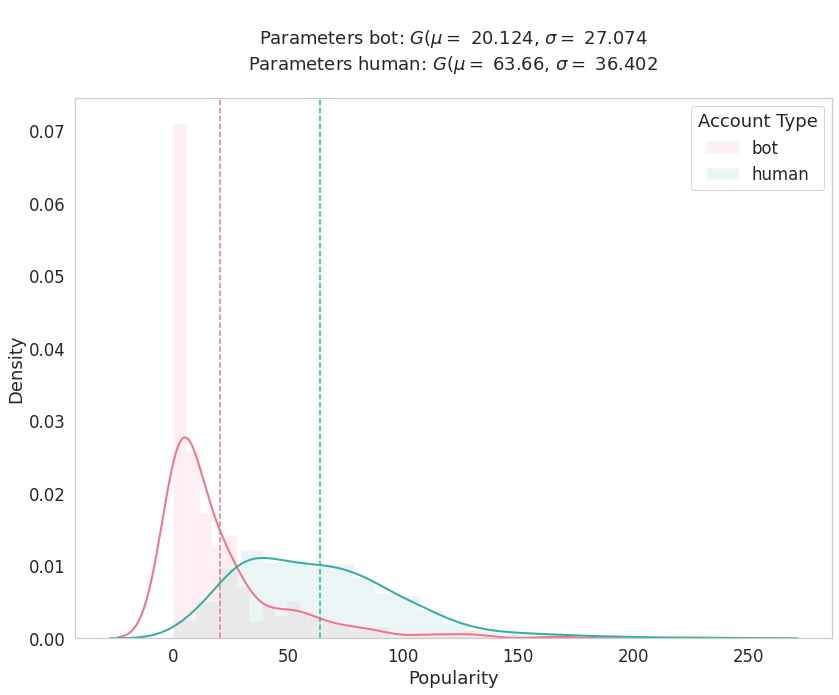

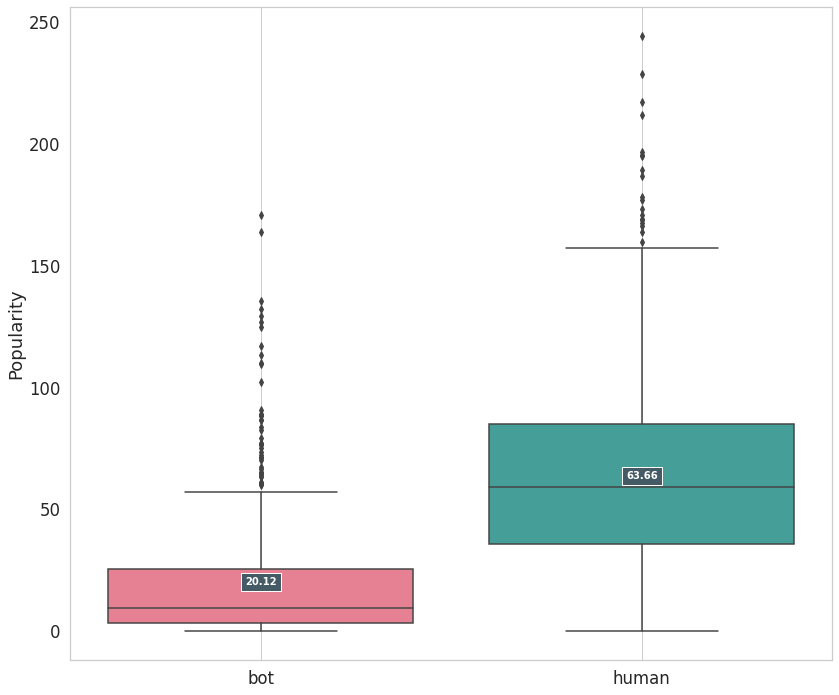

In [ ]:
target: str = "popularity"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

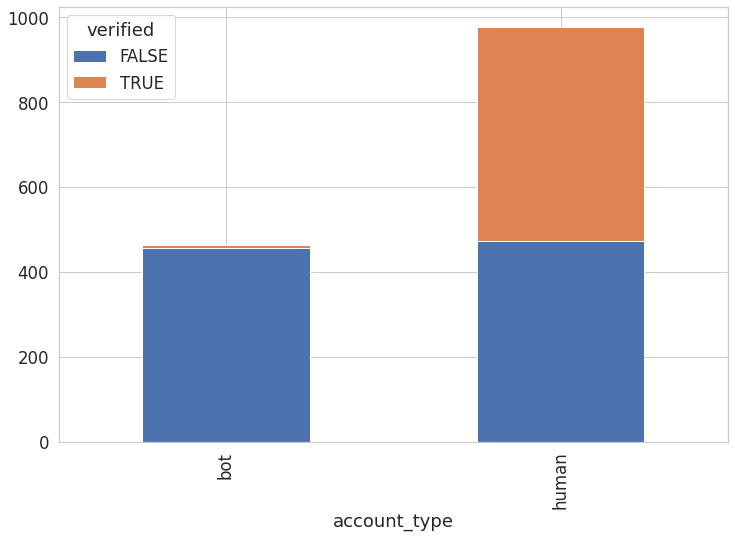

In [ ]:
target_col: str = "verified"
twitter_accounts_df2 = twitter_accounts_df.groupby([grouped, target_col])[grouped].count().unstack(target_col)
twitter_accounts_df2.plot(kind='bar', stacked=True)

In [ ]:
# Preprocess Response variable (account type)
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].astype('category')
twitter_accounts_df.dtypes

screen_name                object
location                   object
description                object
followers_count           float64
friends_count             float64
favourites_count          float64
verified                   object
statuses_count            float64
lang                       object
default_profile             int64
default_profile_image      object
account_type             category
popularity                float64
dtype: object

In [ ]:
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].cat.codes
twitter_accounts_df.head()

,screen_name,location,description,followers_count,friends_count,favourites_count,verified,statuses_count,lang,default_profile,default_profile_image,account_type,popularity
id_str,,,,,,,,,,,,,
8.157458e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...",1291.0,0.0,0.0,FALSE,78554.0,en,1,False,0,0.000
4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,1.0,349.0,38.0,FALSE,31.0,en,1,False,0,4.060
2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,11.0,745.0,146.0,FALSE,185.0,en,0,False,0,16.437
2.482835e+09,_all_of_us_,in a machine.,bot by @rubicon,193.0,0.0,0.0,FALSE,6068.0,en,0,False,0,0.000
2.717905e+09,everycheese,cheese land,cheese cheese cheese // updates every 4 hours ...,51.0,1.0,0.0,FALSE,111.0,en,0,False,0,2.739


In [ ]:
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df.copy()
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df_num._get_numeric_data()
twitter_accounts_df_num.head()

,followers_count,friends_count,favourites_count,statuses_count,default_profile,account_type,popularity
id_str,,,,,,,
8.157458e+17,1291.0,0.0,0.0,78554.0,1,0,0.000
4.843621e+09,1.0,349.0,38.0,31.0,1,0,4.060
2.955142e+09,11.0,745.0,146.0,185.0,0,0,16.437
2.482835e+09,193.0,0.0,0.0,6068.0,0,0,0.000
2.717905e+09,51.0,1.0,0.0,111.0,0,0,2.739


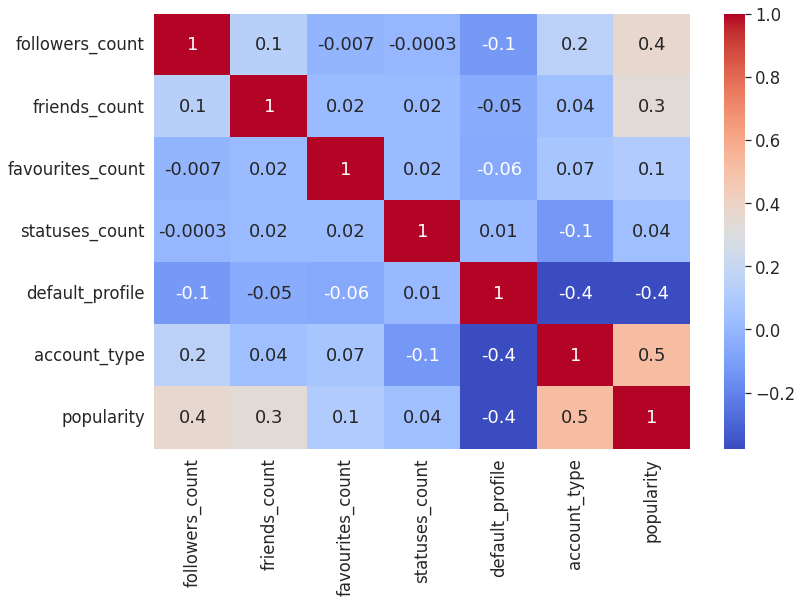

In [ ]:
# Compute correlation among the features and the response variable
corr: pd.DataFrame = twitter_accounts_df_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')